**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as: [Ashish Arora in Medium](https://medium.com/@ashisharora2204/logistic-regression-maximum-likelihood-estimation-gradient-descent-a7962a452332). Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.


# 16: Regresión Logística

La Regresión Logística (RL) es un modelo lineal como la regresión lineal, pero tiene una trasnformacion con la función logit, la cual mantiene los valores de la variable dependiente $y$ entre 0 y 1. Es por esto que se utiliza como un modelo supervisado para clasificaciones.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from math import exp

import warnings
warnings.simplefilter("ignore")

## Maximum Likelihood Estimation (MLE)

Maximum Likelihood Estimation is a statistical method used to estimate the parameters of a probabilistic model based on observed data. The goal of MLE is to find the set of parameter values that maximize the likelihood function, which measures the probability of observing the given data under the assumed model.

1. **Likelihood Function**: The likelihood function, denoted by L(θ | D), is a function of the model parameters θ and the observed data D. It represents the probability of observing the data D given a specific value of the parameters θ. For independent and identically distributed (i.i.d.) data, the likelihood is often expressed as the product of the individual data point probabilities.

2. **Log-Likelihood Function**: In practice, it is common to work with the log-likelihood function, denoted by log L(θ | D), which is the natural logarithm of the likelihood function. Taking the logarithm makes computations easier and helps prevent numerical underflow for large datasets.

3. **MLE Objective**: The MLE objective is to find the parameter values θ that maximize the log-likelihood function.

### Ejemplo
Supongamos que tenemos una serie de datos x = (1, 2, 3), y necesitamos saber la función que generó dichos datos. Si suponemos que dicha función es normal con la siguiente ecuación y con media (μ) y desviación estandar ($σ$)

$\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)$

Necesitamos solo entonces obtener el valor de μ y $\sigma$. el método de MLE nos permite encontrar dichos valores.

Para eso supongamos tres distribuciones normales con media 0, 2 y 6, y para simplicidad del problema supongamos desviación estandar de 1 para todas ellas [N(0,1), N(2,1), N(6,1)]. Cual de estas tres funciones normales es mas probable que haya originado los datos?.

(-5.0, 10.0)

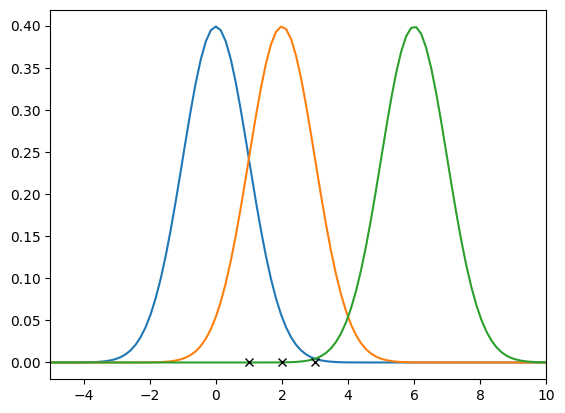

In [6]:
from scipy.stats import norm
x = np.linspace(-5, 10, 100)
N_0 = norm.pdf(x, loc=0, scale=1)
N_2 = norm.pdf(x, loc=2, scale=1)
N_6 = norm.pdf(x, loc=6, scale=1)
plt.plot(x,N_0)
plt.plot(x,N_2)
plt.plot(x,N_6)
plt.plot(1,0, 'xk')
plt.plot(2,0, 'xk')
plt.plot(3,0, 'xk')
plt.xlim(-5,10)

Como se puede observar en la figura, obviamente la función normal con media 2 y desviación estandar 1 es dicha función. Es decir que dicha funcion maximiza la función de probabilidad.

In [7]:
#datos
x=(1,2,3)
#Para la funcion con media 0 y desviacion 1 la probabilidad de cada valor de x corresponde a
print(norm.pdf(x, loc=0, scale=1))
#Para la funcion con media 2 y desviacion 1 la probabilidad de cada valor de x corresponde a
print(norm.pdf(x, loc=2, scale=1))
#Para la funcion con media 6 y desviacion 1 la probabilidad de cada valor de x corresponde a
print(norm.pdf(x, loc=6, scale=1))

[0.24197072 0.05399097 0.00443185]
[0.24197072 0.39894228 0.24197072]
[1.48671951e-06 1.33830226e-04 4.43184841e-03]


Si se supone que las probabilidades para cada valor son independientes, entonces la probabilidad conjunta (Pμ/x1,x2,x3) es igual al producto de las tres probabilidades:

In [8]:
print(np.prod(norm.pdf(x, loc=0, scale=1)))
print(np.prod(norm.pdf(x, loc=2, scale=1)))
print(np.prod(norm.pdf(x, loc=6, scale=1)))

5.7898701535918536e-05
0.02335800330543158
8.817960516372012e-13


En este caso la función con media 2 y desviacion estandar 1 tienen el mayor valor. A continuación se puede observar de forma gráfica. Generalmente se prefiere utilizar la función logarítmica, ya que es una función monotónica y permite idetificar mejor dicho valor máximo.

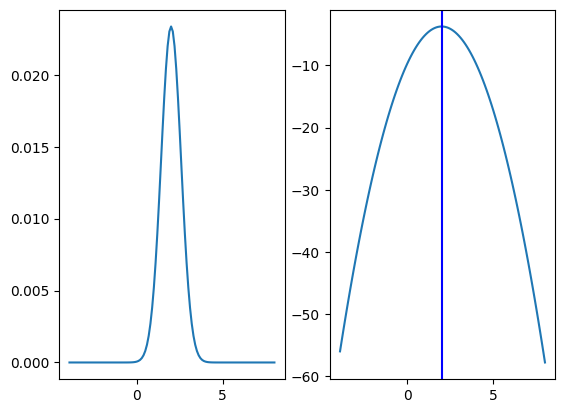

In [9]:
m = np.linspace(-4, 8, 121)
# Plotting likelihood and log-of-likelihood
m1=[None]*len(m)
m2=[None]*len(m)
for i in range(1,len(m)):
  # Likelihood
  m1[i]=np.prod(norm.pdf(x,loc=m[i],scale=1))
  # log-of-Likelihood
  m2[i]=np.log(norm.pdf(x,loc=m[i],scale=1)).sum()

# Likelihood
fig, ax = plt.subplots(1,2)
ax[0].plot(m,m1)
# Log-of-Likelihood
ax[1].plot(m,m2)
plt.axvline(x=2, color='b')

#### Ejemplo
Vamos a generar datos con un función y parámetros conocidos, y comparemos la PDF para los datos generados con los parámetros conocidos y los parámetros estimados de los datos.

In [10]:
# Generating synthetic data from a Gaussian distribution with known parameters
np.random.seed(42)
true_mean = 5.0
true_std = 2.0
num_samples = 100
data = np.random.normal(loc=true_mean, scale=true_std, size=num_samples)

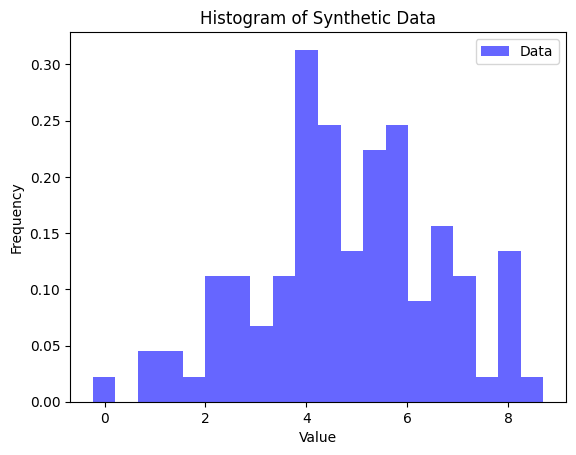

In [11]:
# Visualization of the data distribution
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data')
plt.title('Histogram of Synthetic Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

A continuación se estima la MLE con los parámetros estimados de los datos tomando el producto de la PDF, en este caso de una una función normal

In [12]:
MLE=np.prod(norm.pdf(data, loc=np.mean(data), scale=np.std(data, ddof=1))) # Using Bessel's correction (ddof=1) for unbiased estimation
print(MLE)

4.718350297253985e-88


A continuación se grafica el MLE y el logaritmo del MLE para 100 valores entre 0 y 10

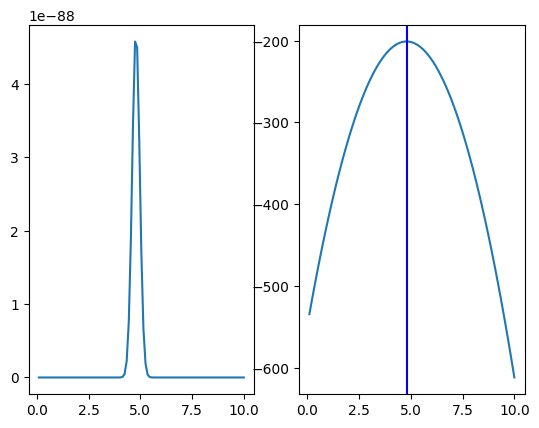

In [14]:
m = np.linspace(0, 10, 100)
m1=[None]*len(m)
m2=[None]*len(m)
for i in range(1,len(m)):
  m1[i]=np.prod(norm.pdf(data,loc=m[i],scale=np.std(data, ddof=1)))
  m2[i]=np.log(norm.pdf(data,loc=m[i],scale=np.std(data, ddof=1))).sum()

fig, ax = plt.subplots(1,2)
ax[0].plot(m,m1)
ax[1].plot(m,m2)
plt.axvline(x=np.mean(data), color='b')

Como se puede observar la MLE se maximiza en el valor medio de los datos. A continuación se grafica la distribución de los datos con los parámetros conocidos, y la distribución con los datos estimados.

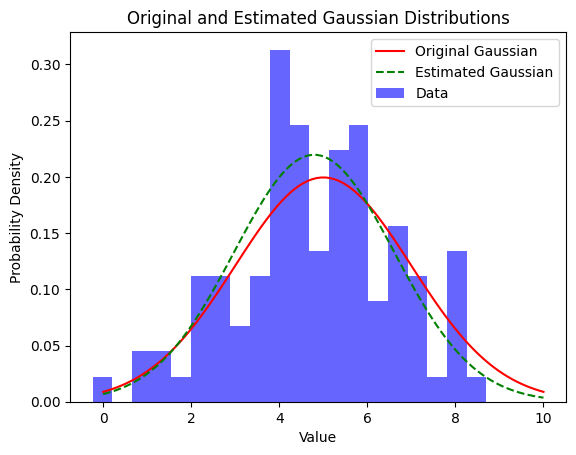

True Mean: 5.0, True Std: 2.0
Estimated Mean: 4.792306965211812, Estimated Std: 1.8163368560156015


In [15]:
# Visualization of the original and estimated Gaussian distributions
x = np.linspace(0, 10, 100)
original_distribution = norm.pdf(x, loc=true_mean, scale=true_std)
estimated_distribution = norm.pdf(x, loc=np.mean(data), scale=np.std(data, ddof=1))

plt.plot(x, original_distribution, 'r', label='Original Gaussian')
plt.plot(x, estimated_distribution, 'g', linestyle='--', label='Estimated Gaussian')
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data')
plt.title('Original and Estimated Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print(f"True Mean: {true_mean}, True Std: {true_std}")
print(f"Estimated Mean: {np.mean(data)}, Estimated Std: {np.std(data, ddof=1)}")

## Regresión logística binaria

Empecemos por graficar, para una variable x con valores entre -10 y 10, la función lineal y la función logística que le corresponde, de tal forma que se establezcan las diferencias entre estas dos funciones.

Text(0.5, 1.0, 'Linear Regression')

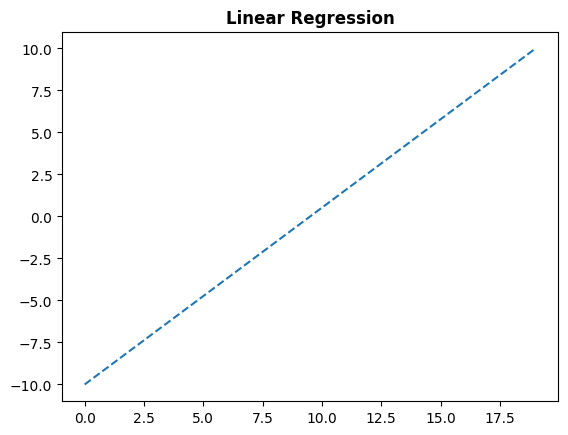

In [5]:
x=np.linspace(-10,10,20)
plt.plot(x,ls="--",label='Linear Regression')
plt.title("Linear Regression",weight="bold")


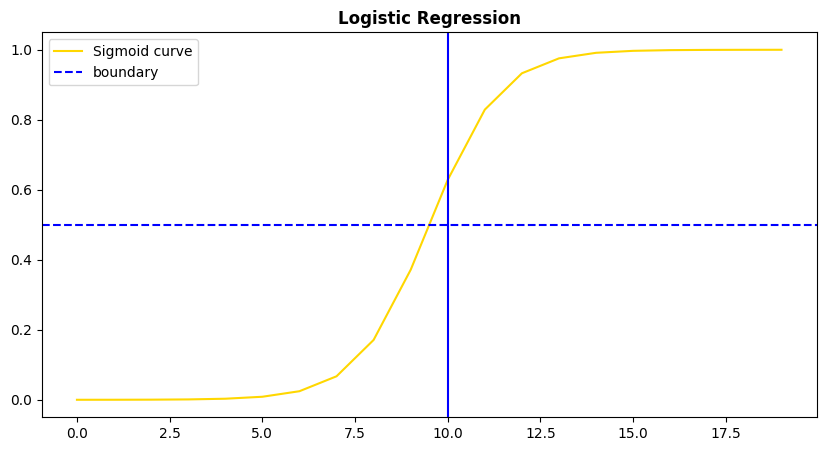

In [4]:
y = 1/(1+np.exp(-(x)))
plt.figure(figsize=(10,5))
plt.plot(y,color='gold',label="Sigmoid curve")
plt.axhline(y = 0.5, color ="b", linestyle ="--",label="boundary")
plt.axvline(x = 10, color ="b")
plt.title("Logistic Regression",weight="bold")
plt.legend(loc="best");

### Cómo interpretar los coeficientes de la RL

La interpretación de los coeficientes de la RL es mas complicado comparado con la regresión lineal, debido a la transformación que se utiliza en la RL.

A continuación se van a simular datos binarios con una dsitribución uniforme a través de la siguiente función.

In [16]:
# simulate binary data
def logistic_regression_simulation(sim_var, sim_error, sim_coef, size):
    
    '''
        Simulates data for simple logistic regression.
        
        inputs:
            sim_var (list)    : 2-element list, first element is the mean of a random variable
                                that is being used to simulate a feature in the logistic regression, 
                                second is the standard deviation
            sim_error (list)   : 2-element list, first element is the mean of random error being added,
                                 second is the standard deviation
            sim_coef (float)   : impact of the random variable established by sim_var on the target 
                                 variable
            size (int)         : number of units to simulate
            
        output:
            sim_df (DataFrame) : dataframe with simulated data
        
    '''
    
    # create an empty dataframe to populate
    sim_df = pd.DataFrame()
    
    # create the feature for the linear regression
    sim_df['var'] = np.random.normal(sim_var[0], sim_var[1], size = size)
    
    # multiply feature by the coef to get a simulated impact
    sim_df['var_impact'] = sim_df['var']*sim_coef
    
    # create error term
    sim_df['sim_error'] = np.random.normal(sim_error[0], sim_error[1], size = size)
    
    # add error and impact together
    sim_df['sum_vars_error'] = sim_df['var_impact'] + sim_df['sim_error']
    
    # create a uniform random variable used to convert sum_vars_error from continuous to binary
    sim_df['uniform_rv'] = np.random.uniform(size = len(sim_df))
    
    # create the binary target variable using the uniform random variable
    sim_df['binary_target'] = sim_df.apply(lambda x : 1 if x.uniform_rv < x.sum_vars_error else 0, axis = 1)
    
    return sim_df

Generemos entonces 30000 valores de $x$ con media 2 y desviacion estandar 0.2, y valores de $y$ como el coeficiente multiplicados por $x$  y sumandole un error normal con media 0 y desviacion estandar 0.1, y finalmente se convierte y en una variable binaria utilizando una distribucion uniforme.

Aplicamos la regresión logística a los datos y obtenemos el coeficiente de $x$.

In [19]:
log_reg_sim_df = logistic_regression_simulation([2, 0.2], [0, 0.1], 0.16, 30000)

X = np.array(log_reg_sim_df['var']).reshape(-1, 1)
y = log_reg_sim_df['binary_target']
log_reg = LogisticRegression()
log_reg.fit(X, y)

log_reg.coef_[0]

array([0.73088173])

Por qué el coeficiente obtenido no es igual al sim_coef que utilizamos para generar los datos?.

Este valor corresponde al logaritmo de los odds, por lo tanto si eliminamos el logaritmo, obtenemos los odds.



In [23]:
print(exp(log_reg.coef_[0]))

2.2201876166515775


Estos son los odds, es decir la relación entre los odds de la probabilidad $y$ sea igual a 1 sobre la probabilidad que $y$ sea igual a 0, dado un valor de $x$, sobre la probabilidad que $y$ sea igual a 1 sobre la probabilidad que $y$ sea igual a 0 dado un valor de $x=0$. Es decir los odds de $x$ de los odds de $y$ dado $x$.

En este caso significa que es 2.2 veces mayores los odds que $y$ sea 1 dado $x$ a que $y$ sea 1 dado un valor de $x=0$.

Para obtener el efecto marginal medio, es decir el cambio o la pendiente de la recta que relaciona $y$ cuando $X$ incrementa una unidad ($\beta1$) es necesario aplicar la derivada parcial con respecto a $x$ de la función logit.

$
   \frac{\partial}{ \partial x} \frac{\text{exp}(\beta_0 + \beta_1 x) }{1 + \text{exp}(\beta_0 + \beta_1 x)}
   =\frac{b_1 \text{exp}(\beta_0 + \beta_1 x) }{(1 + \text{exp}(\beta_0 + \beta_1 x))^2}
$

Por lo tanto, si utilizamos los datos y aplicamos esta derivada y su valor medio, podemos obtener el efecto marginal medio, es decir el cambio que tiene $y$ cuando $x$ incrementa 1.

(array([ 1.,  1.,  0.,  3.,  4.,  5., 13.,  7.,  6., 12.,  8., 10.,  5.,
         8.,  3.,  4.,  5.,  2.,  2.,  1.]),
 array([0.10916205, 0.11417372, 0.11918539, 0.12419706, 0.12920873,
        0.1342204 , 0.13923207, 0.14424373, 0.1492554 , 0.15426707,
        0.15927874, 0.16429041, 0.16930208, 0.17431375, 0.17932542,
        0.18433709, 0.18934876, 0.19436043, 0.1993721 , 0.20438377,
        0.20939544]),
 <BarContainer object of 20 artists>)

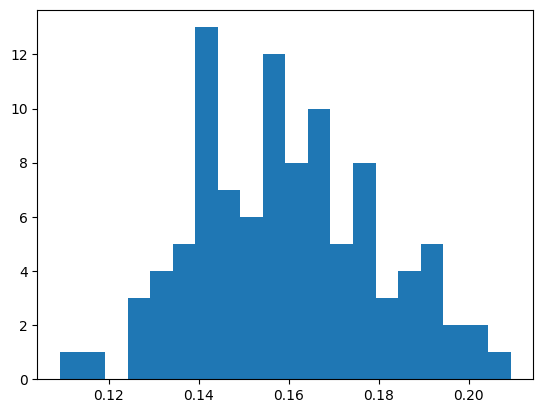

In [24]:
iters = 100
mean_marginal_impacts = []
coef_list = []

# create iters number of simulated datasets
for i in range(iters):
    
    # create simulated data
    log_reg_sim_df = logistic_regression_simulation([2, 0.2], [0, 0.1], 0.16, 10000)
    
    # run regression and get coefficient and intercept
    log_reg = LogisticRegression()
    X = np.array(log_reg_sim_df['var']).reshape(-1, 1)
    y = log_reg_sim_df['binary_target']
    log_reg.fit(X, y)
    
    coef = log_reg.coef_[0][0]
    intercept = log_reg.intercept_[0]
    
    # run the model outputs through the partial derivatives for each simulated observation
    log_reg_sim_df['contribution'] = log_reg_sim_df['var'].apply(lambda x : coef*exp(intercept + (x*coef))/
                                                                         (((exp(intercept + (x*coef)) + 1))**2))
    
    # calculate the mean of the derivative values
    temp_mean_marginal_impact = log_reg_sim_df['contribution'].mean()
    
    # save the original coefficient and marginal impact for 
    # this simulation in a list 
    mean_marginal_impacts.append(temp_mean_marginal_impact)
    coef_list.append(coef)

# show the distribution of simulated mean marginal impacts
plt.hist(mean_marginal_impacts, bins = 20)

La librería $statmodels$ ofrece una función para calcular dicho valor:

In [29]:
iters = 100
sm_marginal_effects = []

for i in range(iters):
    
    # simulate data
    log_reg_sim_df = logistic_regression_simulation([2, 0.2], [0, 0.1], 0.16, 10000)
    
    # define target and predictor variables
    X = np.array(log_reg_sim_df['var'])
    y = log_reg_sim_df['binary_target']
    
    # add constant to formula - statsmodels.Logit doesn't automatically include
    # an intercept like sklearn
    X_with_intercept = sm.add_constant(X)
    log_reg_sm = sm.Logit(y, X_with_intercept)
    result = log_reg_sm.fit(disp=False)
    
    # calculate marginal effects
    marginal_effects = result.get_margeff(at = 'all', method = 'dydx')
    
    # save mean marginal effects in a list
    sm_marginal_effects.append(np.mean(marginal_effects.margeff))

0.16108881453268592


(array([ 1.,  1.,  7.,  4.,  2.,  6.,  8.,  5.,  7.,  4.,  9.,  7.,  5.,
        14.,  6.,  1.,  4.,  2.,  6.,  1.]),
 array([0.109123  , 0.11421365, 0.11930431, 0.12439497, 0.12948562,
        0.13457628, 0.13966693, 0.14475759, 0.14984824, 0.1549389 ,
        0.16002955, 0.16512021, 0.17021086, 0.17530152, 0.18039218,
        0.18548283, 0.19057349, 0.19566414, 0.2007548 , 0.20584545,
        0.21093611]),
 <BarContainer object of 20 artists>)

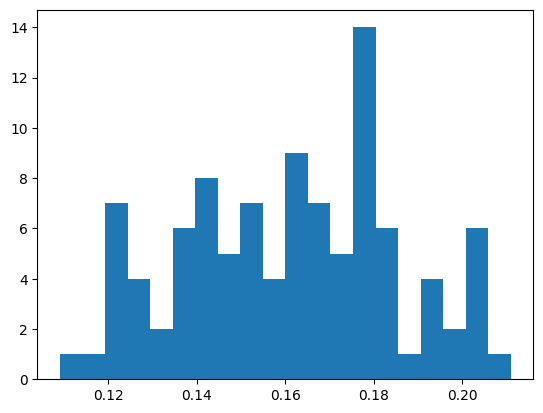

In [30]:
print(np.mean(sm_marginal_effects))
plt.hist(sm_marginal_effects, bins = 20)

## Datos para la regresión logística

En este caso se van a utilizar los datos de la base de datos para un modelo de predicción de movimientos en masa, donde la variable objetivo es 1 o 0, que corresponde a si la celda corresponde a un movimiento en masa o no, respectivamente.

In [6]:
df= pd.read_excel('https://github.com/edieraristizabal/MachineLearning/raw/master/data/BD_lamiel.xlsx', sheet_name='Sheet1')
df.head(2)

,Unnamed: 0,inventario,pendiente,aspecto,geologia
0,0,0,10.862183,208.523560,14
1,1,0,12.265345,207.437332,14


Para formar la matriz *X* con las variables predictoras se debe eliminar la columna con el inventario de movimientos en masa, que corresponde a la variable dependiente *y*, y una columna, para este caso, denominada *Unnamed: 0* que representa los índices de las filas importados de Excel.

In [7]:
X=df.drop(['inventario','Unnamed: 0'],axis=1)
X.head(2)

,pendiente,aspecto,geologia
0,10.862183,208.523560,14
1,12.265345,207.437332,14


In [8]:
y=df['inventario']
y.head(2)

0    0
1    0
Name: inventario, dtype: int64

## Regresión logística con Statsmodels

Al igual que en el caso de modelos lineales, una buena opción es la librería statsmodels, ya que arroja la hoja de resultados con diferentes métricas que permiten conocer los resultados directamente.

Como la variable geologia es categórica se debe transformar a variables binarias o dummies. Inicialmente es importante saber cuantas clases tiene:

In [31]:
print(np.unique(X['geologia']))

[ 2  4  6  8  9 10 11 14 15 16]


Y posteriormente se transforma con la siguiente función:

In [14]:

dummy_geologia=pd.get_dummies(X['geologia'],prefix='geo')
dummy_geologia.head(2)

,geo_2,geo_4,geo_6,geo_8,geo_9,geo_10,geo_11,geo_14,geo_15,geo_16
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0


Luego se debe incorporar las variables binarias creadas y remover la variable previa que contenía la geología.

In [15]:
column_name=X.columns.values.tolist()
column_name.remove('geologia')
X1=X[column_name].join(dummy_geologia)
X1.head()

,pendiente,aspecto,geo_2,geo_4,geo_6,geo_8,geo_9,geo_10,geo_11,geo_14,geo_15,geo_16
0,10.862183,208.523560,0,0,0,0,0,0,0,1,0,0
1,12.265345,207.437332,0,0,0,0,0,0,0,1,0,0
2,12.469252,202.684647,0,0,0,0,0,0,0,1,0,0
3,13.148026,211.619766,0,0,0,0,0,0,0,1,0,0
4,14.091524,220.028976,0,0,0,0,0,0,0,1,0,0


Como las clases de las variables categóricas son transformadas en variables binarias, se forma multicolinealidad, ya que las variables binarias creadas suman un vector de valores 1. Para eliminar esta multicolinealidad se debe eliminar una variable, por lo que los coeficientes de las demas clases son con respecto a dicha clase, y el coeficiente de la clase eliminada se encuentra dentro del intercepto. 

En este caso eliminaremos la variable 'geo_2'.

In [35]:
X1.drop('geo_2',axis=1,inplace=True)
X1.head()

,pendiente,aspecto,geo_4,geo_6,geo_8,geo_9,geo_10,geo_11,geo_14,geo_15,geo_16
0,10.862183,208.523560,0,0,0,0,0,0,1,0,0
1,12.265345,207.437332,0,0,0,0,0,0,1,0,0
2,12.469252,202.684647,0,0,0,0,0,0,1,0,0
3,13.148026,211.619766,0,0,0,0,0,0,1,0,0
4,14.091524,220.028976,0,0,0,0,0,0,1,0,0


La función Logit de *statsmodels* no incluye por defecto el intercepto, por lo tanto se debe adicionar a las variables independientes una columna con una constante de tal forma que se pueda obtener el intercepto.

In [36]:
model1=sm.Logit(y,sm.add_constant(X1))
result1=model1.fit(method='nm')
print(result1.summary())

c:\Users\edier\miniconda3\envs\carto\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
c:\Users\edier\miniconda3\envs\carto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               910801
Model:                          Logit   Df Residuals:                   910789
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  -35.70
Time:                        19:15:51   Log-Likelihood:            -4.3586e+05
converged:                      False   LL-Null:                       -11876.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.009     -0.016      0.987      -0.017       0.017
pendiente  -4.336e-05      0.000     -0.218      0.827      -0.000       0.000
aspecto       -0.0024   2.32e-05   -102.300      0.0

Entre los resultados se destacan el estimador para los coeficientes (máxima verosimilitud -MLE-), el logaritmo del estimador MLE (Log-likelihood), el coeficiente de ajuste (Pseudo R-squ.). Con respecto a los coeficientes se presenta el valor de la prueba de hipótesis nula que el valor del coeficiente sea igual a cero (z) como el valor del coeficiente y el error estandar (std err), y el *p-value* (P>|z|), este valor debe ser menor al 5% (0.05), lo cual significa que la probabilidad que el coeficiente tenga un valor de 0 es muy bajo.  Finalmente se presenta el rango del 95% del dominio del valor del coeficiente, si el coeficiente es estadísticamente significativo, dicho rango no debe contener el valor 0.

Para obtener los pesos de las variables o coeficientes, se puede utilizar también la siguiente función.

In [37]:
result1.params

const       -0.000144
pendiente   -0.000043
aspecto     -0.002373
geo_4        0.000563
geo_6       -0.000169
geo_8        0.000089
geo_9        0.000020
geo_10       0.000597
geo_11      -0.000045
geo_14       0.000722
geo_15       0.000561
geo_16       0.000023
dtype: float64

Existen diferentes métodos para resolver el problema de regresión, por lo tanto se puede modificar dicho argumento.

In [38]:
result1=model1.fit(method='bfgs')
print(result1.summary())

c:\Users\edier\miniconda3\envs\carto\Lib\site-packages\scipy\optimize\_optimize.py:1359: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\edier\miniconda3\envs\carto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.012931
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               910801
Model:                          Logit   Df Residuals:                   910789
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                0.008328
Time:                        19:16:53   Log-Likelihood:                -11777.
converged:                      False   LL-Null:                       -11876.
Covariance Type:            nonrobust   LLR p-value:                 2.108e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3694      0.097    -65.668      0.000      -6.560      -6.1

En el siguiente link se pueden consultar las diferentes argumentos y opciones de la función RL en statsmodels.

https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.fit.html#statsmodels.api.Logit.fit

También es posible utilizar la librería *statsmodels.formula.api*, la cual permite utilizar la nomenclatura *Platsy* que permite el uso de formulas, y mejora la comprensión e interpretación del modelo. Esta librearía incorpora por defecto el intercepto en el modelo y en las fórmulas pueden especificar el tipo de variables categóricas con una *C*. Esto permite que automáticamente el modelo convierta en binaria las clases de la variable categórica y elimine una de ellas, por defecto la primera. En caso de querer eliminar el intercepto se incorpora en la formula " - 1" 

In [10]:
import statsmodels.formula.api as sfm

In [17]:
lr   = sfm.logit(formula = "inventario ~ pendiente + C(geologia)", data = df).fit()
print(lr.summary())

         Current function value: 0.012661
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               910801
Model:                          Logit   Df Residuals:                   910790
Method:                           MLE   Df Model:                           10
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                 0.02902
Time:                        12:44:24   Log-Likelihood:                -11532.
converged:                      False   LL-Null:                       -11876.
Covariance Type:            nonrobust   LLR p-value:                1.220e-141
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.2365      0.089    -81.628      0.000      -7.410      -7.063
C(geologia)[T.4]     -8.0658     96.864     

Ahora para compararlos coeficientes:

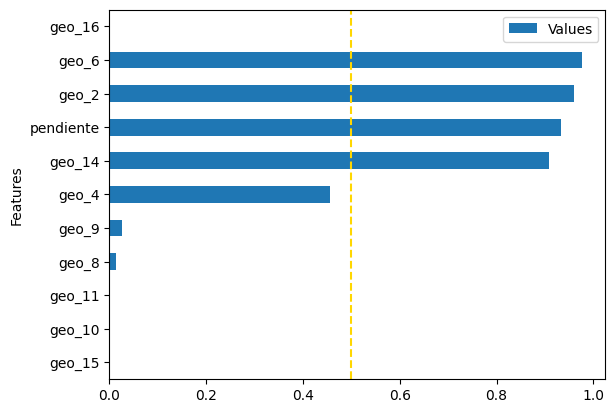

In [21]:
X1.drop('aspecto',axis=1,inplace=True)
X_feat = X1.columns
pv=lr.pvalues
val = pd.DataFrame(pv[1:].values,columns=["Values"])
feats = pd.DataFrame(X_feat,columns=['Features'])
feat_val=pd.concat([feats,val],axis=1)
feat_val.set_index("Features",inplace=True)
feat_val.sort_values(by='Values').plot(kind='barh')
plt.axvline(x = 0.5, color ="gold",ls="--");

## Regresión ligística con Sklearn

La librería de Sklearn es mas ágil en resolver los problemas de RL. Como hiperparámetro utiliza el C, el cual regulariza los coeficientes, de forma similar a LASSO, pero de forma 1/C. Es por esto que no se obtienen coeficientes similares que para *Statsmodels*, se pueden aproximar asignando un valor para regularizar muy bajo o modificando el argumento *penalty=None*. En cuanto al intercepto, esta librería cuenta con un argumento denominado *fit_intercept* el cual por defecto se encuentra en *True*, si se ajusta a *False* se elimina el intercepto.

In [44]:
#model = LogisticRegression(C=1e30)
model=LogisticRegression(penalty=None)

En el siguiente link se pueden conocer los diferentes argumentos de la función RL en Sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Luego de instanciar el modelo se ajusta a los datos y se pueden obtener tanto los coeficientes como el intercepto.

In [45]:
model2=model.fit(X1,y)
model2.coef_

c:\Users\edier\miniconda3\envs\carto\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 3.98494503e-02,  1.39724415e-04, -3.52172475e-02,
        -5.08222818e-01,  3.91478101e-01, -2.74095331e+00,
        -3.88330356e-01,  2.31945099e-01, -5.55564633e-01,
         5.15636573e-01, -1.65907202e+00]])

In [46]:
model2.intercept_

array([-7.31819658])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y)

A continuación se evaluán algunas de las métricas ya estudiadas en otros talleres.

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Score_train=accuracy_score(y_train,model2.predict(X_train))
print('Precision en entrenamiento:',Score_train)
Score_test=accuracy_score(y_test,model2.predict(X_test))
print('Precision en validacion:',Score_test)
print(classification_report(y_test,model2.predict(X_test)))

Precision en entrenamiento: 1.0
Precision en validacion: 1.0


El método de RL puede arrojar valores categóricos en la predicción, en este caso 0 y 1, o probabilidades para cada caso, de la siguiente forma.

In [66]:
predictions = model2.predict(X_test)
probabilities = model2.predict_proba(X_test)[:, 1]
predictions,probabilities

El método de partición *cross validation* se puede utilizar de la siguiente manera:

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(model, X, y, cv=kfold)
print('Valor medio:',results.mean())
print('Desviacion estandar:',results.std())

Valor medio: 0.919047619047619
Desviacion estandar: 0.09786843869459148
